In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [22]:
df = pd.read_csv("./localisation_logs.csv")
df.head()

,DateTime,Robot_X,Robot_Y,Robot_Angle,Ball_X,Ball_Y
0,09.02.2024 21:48:28,-0.049646,0.111455,-0.015986,0.075607,1.46080
1,09.02.2024 21:48:28,-0.049646,0.111455,-0.015971,0.075707,1.46080
2,09.02.2024 21:48:28,-0.239089,1.040000,-0.015955,0.075873,1.46167
3,09.02.2024 21:48:28,-0.101059,1.058200,-0.004182,0.070520,1.33220
4,09.02.2024 21:48:28,-0.101053,1.058080,-0.004240,0.070281,1.33212


In [23]:
features = ['Robot_X', 'Robot_Y', 'Robot_Angle', 'Ball_X', 'Ball_Y']
data = df[features]
data.index = df['DateTime']
data.head()

,Robot_X,Robot_Y,Robot_Angle,Ball_X,Ball_Y
DateTime,,,,,
09.02.2024 21:48:28,-0.049646,0.111455,-0.015986,0.075607,1.46080
09.02.2024 21:48:28,-0.049646,0.111455,-0.015971,0.075707,1.46080
09.02.2024 21:48:28,-0.239089,1.040000,-0.015955,0.075873,1.46167
09.02.2024 21:48:28,-0.101059,1.058200,-0.004182,0.070520,1.33220
09.02.2024 21:48:28,-0.101053,1.058080,-0.004240,0.070281,1.33212


array([<Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>, <Axes: xlabel='DateTime'>,
       <Axes: xlabel='DateTime'>], dtype=object)

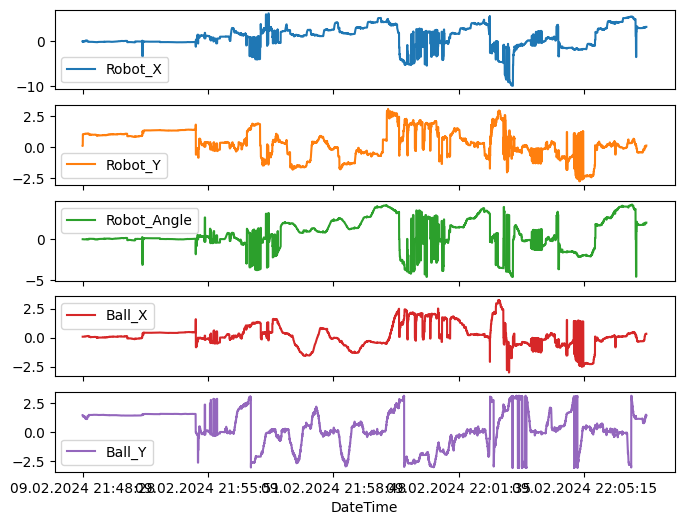

In [24]:
data.plot(subplots=True)



In [27]:
TRAIN_SPLIT = int(0.8 * len(data))

In [31]:
dataset = data.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

dataset = (dataset - data_mean) / data_std

In [30]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [32]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 0:1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 0:1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [33]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))


Single window of past history : (120, 5)


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt